<html>
  <h1 align="center";> Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
  </h1>
<hr>
  <h3 align="center";>
  Edición 2022
  </h3>
<hr>
  <h1 align="center";>
  Llamados Atendidos de Violencia Familiar Unificado con Series Temporales
  </h1>
<hr>
  <h2 align="center";>
  Trabajo Práctico 3 - Aprendizaje Supervisado
  </h2>
</html>

## Mentora:
- Isabel Rivadero

## Integrantes:
- Rinaudo, Eleana
- Sulca, Anahí

## Descripción

Los datos corresponden a información recopilada correspondiente a los llamados de todo el país atendidos por los y las profesionales del 137 sobre casos de Violencia Familiar desde Enero de 2017 hasta Febrero del 2022 organizados de manera unificada.

Pueden consultar en:
[Dataset Línea 137 - Victimas de Violencia Familiar](http://datos.jus.gob.ar/dataset/linea-137-victimas-de-violencia-familiar)

El dataset contiene información de:
-  `caso id`
- `descripcion del llamante`
- `género del llamante`
- `tipo de violencia`
- `género de la víctima`
- `cantidad de victimas`
- `cantidad de agresores`
- `género del agresor`
- `relación con la víctima`
- `fecha de la llamada`
- `hora de la llamada`.

Repositorio con los datos listos para procesar:
- [Repositorio Mentoría](https://github.com/IsabelRivadero/ir-mentoria2022)

---
## Objetivo

Este práctico de **Aprendizaje Supervisado** consistirá en
con información precisa que comprende los últimos 5 años de llamadas sobre casos de Violencia Familiar a lo largo de todo el territorio nacional, **entrenar** un modelo de series temporales (no se requiere hacer el análisis propio y más
avanzado de series temporales, sino que se espera un desarrollo
introductorio) para **predecir** comportamientos por días y
horarios(opcionalmente), como así también encontrar tendencias y
comportamientos periódicos.

---
## Consignas:

1. Pasar el código propuesto, a una copia del notebook que venían
trabajando, compartir y subir cambios a un nuevo branch.
2. Usar los datos que obtuvieron luego de aplicar la limpieza que
trabajaron en el práctico anterior.
3. Completar el TP3 usando el código guía que les comparto, y
continuar la experimentación probando con variaciones de parámetros,
hasta obtener la predicción con mejor ajuste a lo que realmente sucedió
y la mejor métrica.
Tener en cuenta las particularidades del intervalo de tiempo que se
desea predecir.
4. Además se les pide realizar todo el procedimiento nuevamente para
otra escala de tiempo (horas, semanas, meses) y las variaciones que
crean necesarias para mejorar los resultados.
5. Investigar y aplicar por lo menos una métrica extra a las que se dan
en el código de ejemplo.
6. Escribir conclusión. Investigar si lo que se observa coincide con algún otro estudio zonal en esa misma época.



<html>
<hr>
  <h1 align="center";>
  Desarrollo
  </h1>
</html>

## Importación de librerías

Importamos la librerías que vamos a utilizar en la Mentoría.

In [191]:
import warnings
import plotly.express as px
import plotly.graph_objects as go
import io
import datetime as dt
import numpy
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None
pd.set_option("display.max_columns", 20)
pd.set_option("display.max_rows", 20)
sns.set_context("talk")


## Lectura del dataset

Detalle de los llamados de todo el país atendidos por las y los profesionales de la Línea 137, de alcance nacional, sobre casos de Violencia Familiar. La unidad de análisis en este recurso es la víctima principal del caso. Cada fila identifica un llamado y su víctima principal. Corresponde al período comprendido desde Enero de 2017 hasta Febrero del 2022 organizados de manera unificada. Pueden consultar mas información en
[Dataset Línea 137 - Victimas de Violencia Familiar](http://datos.jus.gob.ar/dataset/linea-137-victimas-de-violencia-familiar).

Para poder leer nuestro dataset necesitamos descargarlo desde el [Repositorio de la Mentoría](https://raw.githubusercontent.com/eleanarinaudo/Linea-137-Diplo2022/main/csv/linea137.csv).


In [192]:
url = "https://raw.githubusercontent.com/eleanarinaudo/Linea-137-Diplo2022/main/Analisis%20Supervisado/data/linea137.csv"
linea137_df = pd.read_csv(url, parse_dates=[0])



Creamos el DataFrame que lo asignamos con la variable `linea137_df` y, además, usamos el método `pd.read_csv` que lee el dataset en Dataframe.


Veamos el contenido del DataFrame `linea137_df` que es el mismo que hicimos en la notebook anterior.

In [193]:
linea137_df= linea137_df.rename(columns={'Unnamed: 0': 'index'})
linea137_df.head()


,caso_id,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,violencia_tipo,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,llamado_hora,tipo_violencia_Económica,tipo_violencia_Física,tipo_violencia_No-Aplica,tipo_violencia_Otras,tipo_violencia_Psicológica,tipo_violencia_Sexual,fecha_y_hora
0,344552.0,Comisaría,Masculino,Otro/a no Familiar,Física y psicológica,Femenino,3,1,Masculino,Pareja,La víctima no aceptó la intervención del Equip...,2017-01-01,1:37,0,1,0,0,1,0,2017-01-01 01:37:00
1,344553.0,Comisaría,Femenino,Sin datos,Física y psicológica,Femenino,2,1,Masculino,Hermano/a,Llamante solicitó información y/o orientación,2017-01-01,6:42,0,1,0,0,1,0,2017-01-01 06:42:00
2,344554.0,Víctima,Femenino,Madre,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:48,0,1,0,0,1,0,2017-01-01 06:48:00
3,344555.0,Víctima,Femenino,No hay niñas/os,Física y psicológica,Femenino,1,1,Masculino,Pareja,Llamante solicitó información y/o orientación,2017-01-01,6:54,0,1,0,0,1,0,2017-01-01 06:54:00
4,344556.0,Comisaría,Masculino,Otro/a no Familiar,Psicológica,Masculino,1,1,Femenino,Madre,Llamante solicitó información y/o orientación,2017-01-01,7:11,0,0,0,0,1,0,2017-01-01 07:11:00


In [194]:
linea137_df.dtypes

caso_id                              object
llamante_descripcion                 object
llamante_genero                      object
llamante_vinculo_ninios_presentes    object
violencia_tipo                       object
victima_genero                       object
victima_cantidad                      int64
agresor_cantidad                      int64
agresor_genero                       object
agresor_relacion_victima             object
llamado_derivacion                   object
llamado_fecha                        object
llamado_hora                         object
tipo_violencia_Económica              int64
tipo_violencia_Física                 int64
tipo_violencia_No-Aplica              int64
tipo_violencia_Otras                  int64
tipo_violencia_Psicológica            int64
tipo_violencia_Sexual                 int64
fecha_y_hora                         object
dtype: object

Eliminamos las columnas de `caso_id`, `violencia_tipo` y `fecha_y_hora` ya que no es de nuevo interés.

In [195]:
linea137_df = linea137_df.drop(['violencia_tipo'], axis=1)
linea137_df = linea137_df.drop(['fecha_y_hora'], axis=1)
linea137_df = linea137_df.drop(['caso_id'], axis=1)

Antes de seguir con el análisis, decidimos eliminar las filas que contienen los datos después del 2021-12-31 ya que no tenemos muchos datos del 2022.

In [196]:
linea137_df["fecha_hora"] = linea137_df.llamado_fecha.astype(str) + " " + linea137_df.llamado_hora.astype(str)
linea137_df["fecha_hora"] = pd.to_datetime(
    linea137_df["fecha_hora"], format="%Y-%m-%d %H:%M:%S"
)
linea137_df.fecha_hora.head()

0   2017-01-01 01:37:00
1   2017-01-01 06:42:00
2   2017-01-01 06:48:00
3   2017-01-01 06:54:00
4   2017-01-01 07:11:00
Name: fecha_hora, dtype: datetime64[ns]

In [197]:
linea137_df["llamado_fecha"] = pd.to_datetime(linea137_df["llamado_fecha"], format="%Y-%m-%d")
linea137_df.dtypes


llamante_descripcion                         object
llamante_genero                              object
llamante_vinculo_ninios_presentes            object
victima_genero                               object
victima_cantidad                              int64
agresor_cantidad                              int64
agresor_genero                               object
agresor_relacion_victima                     object
llamado_derivacion                           object
llamado_fecha                        datetime64[ns]
llamado_hora                                 object
tipo_violencia_Económica                      int64
tipo_violencia_Física                         int64
tipo_violencia_No-Aplica                      int64
tipo_violencia_Otras                          int64
tipo_violencia_Psicológica                    int64
tipo_violencia_Sexual                         int64
fecha_hora                           datetime64[ns]
dtype: object

In [198]:
linea137_df['anio'] = linea137_df['fecha_hora'].dt.year
linea137_df.drop(linea137_df[(linea137_df.anio == 2022)].index, inplace=True)


Agregamos las columnas `mes`, `semana`, `dia` y `dia_semana`

In [199]:
linea137_df['mes'] = linea137_df['fecha_hora'].dt.month
linea137_df['dia'] = linea137_df['fecha_hora'].dt.day
linea137_df['semana'] = linea137_df['fecha_hora'].dt.week
linea137_df['dia_semana'] = linea137_df['fecha_hora'].dt.weekday

Agregamos las columnas `mes del año` y `semana del año`

In [200]:
linea137_df['semana_del_anio'] = linea137_df['anio'].astype("str") +"-" + [sem.zfill(2) for sem in linea137_df['dia_semana'].astype("str")]
linea137_df['mes_del_anio'] = linea137_df['anio'].astype("str") +"-" + [mes.zfill(2) for mes in linea137_df['mes'].astype("str")]


Agregamos la columna `hora`

In [201]:
linea137_df['hora'] = linea137_df['fecha_hora'].dt.strftime('%H')


In [202]:
linea137_df.sample()

,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,...,tipo_violencia_Sexual,fecha_hora,anio,mes,dia,semana,dia_semana,semana_del_anio,mes_del_anio,hora
16605,Familiar,Femenino,Sin datos,Femenino,1,3,Femenino,Hijo/a,No se desplazó un Equipo móvil por tratarse de...,2019-03-19,...,0,2019-03-19 12:42:00,2019,3,19,12,1,2019-01,2019-03,12


## Análisis de valos faltantes

In [203]:
linea137_df.isna().sum()

llamante_descripcion                 0
llamante_genero                      0
llamante_vinculo_ninios_presentes    0
victima_genero                       0
victima_cantidad                     0
                                    ..
semana                               0
dia_semana                           0
semana_del_anio                      0
mes_del_anio                         0
hora                                 0
Length: 26, dtype: int64


El dataset no tiene valores faltantes por lo que no requiere ningún tipo de imputación.


In [204]:
linea137 = linea137_df.copy()

## Normalizamos los datos

In [205]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

linea137["llamante_descripcion"] = le.fit_transform(linea137['llamante_descripcion'])
linea137["llamante_genero"] = le.fit_transform(linea137['llamante_genero'])
linea137["llamante_vinculo_ninios_presentes"] = le.fit_transform(linea137['llamante_vinculo_ninios_presentes'])
linea137["llamante_descripcion"] = le.fit_transform(linea137['llamante_descripcion'])
linea137["victima_genero"] = le.fit_transform(linea137['victima_genero'])
linea137["agresor_genero"] = le.fit_transform(linea137['agresor_genero'])
linea137["agresor_relacion_victima"] = le.fit_transform(linea137['agresor_relacion_victima'])
linea137["llamado_derivacion"] = le.fit_transform(linea137['llamado_derivacion'])
linea137.head()


,llamante_descripcion,llamante_genero,llamante_vinculo_ninios_presentes,victima_genero,victima_cantidad,agresor_cantidad,agresor_genero,agresor_relacion_victima,llamado_derivacion,llamado_fecha,...,tipo_violencia_Sexual,fecha_hora,anio,mes,dia,semana,dia_semana,semana_del_anio,mes_del_anio,hora
0,1,1,4,0,3,1,1,11,3,2017-01-01,...,0,2017-01-01 01:37:00,2017,1,1,52,6,2017-06,2017-01,01
1,1,0,7,0,2,1,1,2,4,2017-01-01,...,0,2017-01-01 06:42:00,2017,1,1,52,6,2017-06,2017-01,06
2,9,0,1,0,1,1,1,11,4,2017-01-01,...,0,2017-01-01 06:48:00,2017,1,1,52,6,2017-06,2017-01,06
3,9,0,2,0,1,1,1,11,4,2017-01-01,...,0,2017-01-01 06:54:00,2017,1,1,52,6,2017-06,2017-01,06
4,1,1,4,1,1,1,0,5,4,2017-01-01,...,0,2017-01-01 07:11:00,2017,1,1,52,6,2017-06,2017-01,07


In [206]:
correlation_matrix = linea137.corr().round(2)
fig = px.imshow(correlation_matrix, 
                color_continuous_scale='Viridis',
                text_auto=True, 
                aspect="auto")
fig.show()



>**Observación:**
>
> Observamos que hay una relación inversamente lineal entre el tipo de violencia Otras y la violencia tipo Psicológica.


#### Agrupamos por `dia`, `mes` y `semana`

In [207]:
df_victimas_x_dia = linea137.groupby(['llamado_fecha'], as_index=False).agg({'victima_cantidad': 'sum'})
df_victimas_x_dia

,llamado_fecha,victima_cantidad
0,2017-01-01,61
1,2017-01-02,87
2,2017-01-03,56
3,2017-01-04,74
4,2017-01-05,54
...,...,...
1819,2021-12-27,51
1820,2021-12-28,55
1821,2021-12-29,47
1822,2021-12-30,21


In [208]:
df_victimas_x_mes = linea137.groupby(['mes_del_anio'], as_index=False).agg({'victima_cantidad': 'sum'})
df_victimas_x_mes

,mes_del_anio,victima_cantidad
0,2017-01,1648
1,2017-02,1393
2,2017-03,1617
3,2017-04,1309
4,2017-05,1212
...,...,...
55,2021-08,1035
56,2021-09,1044
57,2021-10,938
58,2021-11,986


In [209]:
df_victimas_x_semana = linea137.groupby(['semana_del_anio'], as_index=False).agg({'victima_cantidad': 'sum'})
df_victimas_x_semana

,semana_del_anio,victima_cantidad
0,2017-00,2333
1,2017-01,2048
2,2017-02,2208
3,2017-03,1906
4,2017-04,1905
...,...,...
30,2021-02,1833
31,2021-03,1743
32,2021-04,1671
33,2021-05,1437


---
### Analizamos la cantidad de casos por cada **Día por año**

Pasamos a formato `datetime`

In [210]:
df_victimas_x_dia['llamado_fecha'] =  pd.to_datetime(df_victimas_x_dia['llamado_fecha'])
df_victimas_x_dia.dtypes


llamado_fecha       datetime64[ns]
victima_cantidad             int64
dtype: object

In [211]:
df_victimas_x_dia.head()

,llamado_fecha,victima_cantidad
0,2017-01-01,61
1,2017-01-02,87
2,2017-01-03,56
3,2017-01-04,74
4,2017-01-05,54


In [212]:
df_victimas_x_dia.llamado_fecha.value_counts() 

2017-01-01    1
2020-05-12    1
2020-05-10    1
2020-05-09    1
2020-05-08    1
             ..
2018-08-28    1
2018-08-27    1
2018-08-26    1
2018-08-25    1
2021-12-31    1
Name: llamado_fecha, Length: 1824, dtype: int64

Evaluamos la cantidad de dias en los años

In [213]:
df_victimas_x_dia.llamado_fecha.dt.year.value_counts()

2020    366
2017    365
2019    365
2021    365
2018    363
Name: llamado_fecha, dtype: int64

In [214]:
df_victimas_x_dia['llamado_fecha'] = pd.to_datetime(df_victimas_x_dia['llamado_fecha'], format= '%Y-%m-%d')

In [215]:
df_victimas_x_dia.dtypes

llamado_fecha       datetime64[ns]
victima_cantidad             int64
dtype: object

In [216]:
fig = px.scatter(df_victimas_x_dia, x='llamado_fecha', y='victima_cantidad')
fig.show()

In [217]:
fig = px.line(df_victimas_x_dia, x="llamado_fecha", y="victima_cantidad")
fig.show()

>**Observación:**
>
> Observamos que hay varios picos.
> - 20 de Febrero del 2017 con 92 casos
> - 12 de Enero del 2017 con 90 casos
> - 7 y 15 de Septiembre del 2020 con 95 casos
>
> A simple vista observamos que los mayores picos fueron en el período del año 2020 hasta 2022, coincidiendo con la pandemia.

---
### Analizamos la cantidad de casos **Meses por año**

Pasamos a formato `datetime`

In [218]:
df_victimas_x_mes['mes_del_anio'] =  pd.to_datetime(df_victimas_x_mes['mes_del_anio']).dt.to_period('M')
df_victimas_x_mes.dtypes


mes_del_anio        period[M]
victima_cantidad        int64
dtype: object

In [219]:
df_victimas_x_mes.head()

,mes_del_anio,victima_cantidad
0,2017-01,1648
1,2017-02,1393
2,2017-03,1617
3,2017-04,1309
4,2017-05,1212


In [220]:
df_victimas_x_mes.mes_del_anio.value_counts() 

2017-01    1
2017-02    1
2019-09    1
2019-10    1
2019-11    1
          ..
2019-01    1
2019-02    1
2019-03    1
2019-04    1
2021-12    1
Freq: M, Name: mes_del_anio, Length: 60, dtype: int64

Evaluamos la cantidad de años en cada mes

In [221]:
df_victimas_x_mes.mes_del_anio.dt.month.value_counts()

1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
11    5
12    5
Name: mes_del_anio, dtype: int64

In [222]:
df_victimas_x_mes.mes_del_anio = df_victimas_x_mes.mes_del_anio.dt.strftime('%Y-%m')

In [223]:
df_victimas_x_mes.dtypes

mes_del_anio        object
victima_cantidad     int64
dtype: object

In [224]:
fig = px.scatter(df_victimas_x_mes, x='mes_del_anio', y='victima_cantidad')
fig.show()

In [225]:
fig = px.line(df_victimas_x_mes, x="mes_del_anio", y="victima_cantidad")
fig.show()

>**Observación:**
>
> Observamos que hay varios picos.
> - Mes de Enero del 2017 con 1648 casos
> - Mes de Marzo del 2017 con 1617 casos
> - Mes de Septiembre del 2020 con 1568 casos
>
> A simple vista observamos que los mayores picos fueron en el período del año 2020 hasta 2022, coincidiendo con la pandemia.

# Aprendizaje Supervisado

Importamos las librerías necesarias

In [226]:
import statsmodels.api as sm

# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose # holt winters 

# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## Descomposición de Series de tiempo 

La librería `statsmodels` tiene una función `season_decompose` que hace la descomposición estacional usando promedio. 

Dada una **serie temporal de datos**, la función se divide en componentes separados de **tendencia**, **estacionalidad** y **residual** (ruido).


### La cantidad de casos por cada **Día por año**

Establecemos como índice `llamado_fecha`

In [227]:
df_victimas_x_dia= df_victimas_x_dia.set_index('llamado_fecha')
df_victimas_x_dia.head()


,victima_cantidad
llamado_fecha,
2017-01-01,61
2017-01-02,87
2017-01-03,56
2017-01-04,74
2017-01-05,54


El parámetro de tipo de modelo puede ser aditivo o multiplicativo, esto depende de si la amplitud de la estacionalidad de sus datos depende del nivel (media). 

- Si la amplitud de la estacionalidad es independiente del nivel, debe usar el modelo aditivo
- Si la amplitud de la estacionalidad depende del nivel, debe usar el modelo multiplicativo.

En este caso usamos el modelo multiplicativo.

Y utlizamos la frecuencia de 180 ya que es la mitad de observaciones que tiene nuestro modelo a analizar.


In [228]:
descomposicion_vict_dia = sm.tsa.seasonal_decompose(df_victimas_x_dia['victima_cantidad'],
                                                  model='mult', freq=180)  


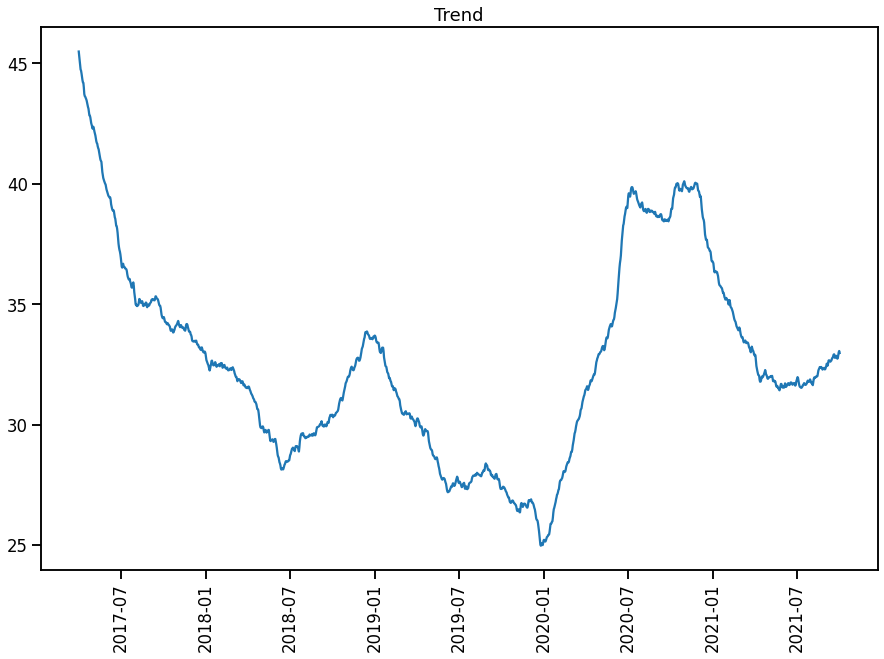

In [229]:
plt.plot(descomposicion_vict_dia.trend);
plt.xticks(rotation=90);
plt.title("Trend")
plt.show() 

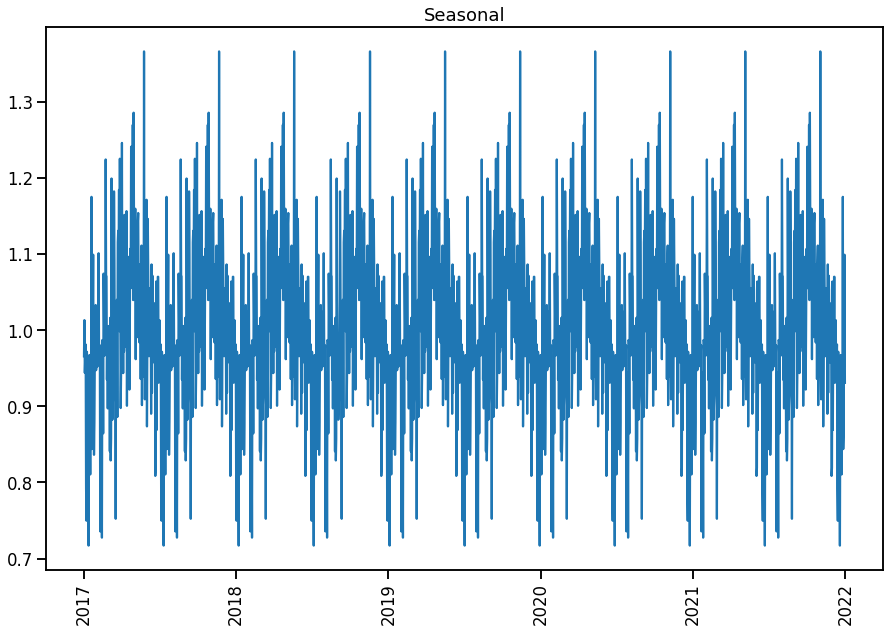

In [230]:
plt.plot(descomposicion_vict_dia.seasonal);
plt.xticks(rotation=90);
plt.title("Seasonal")
plt.show()


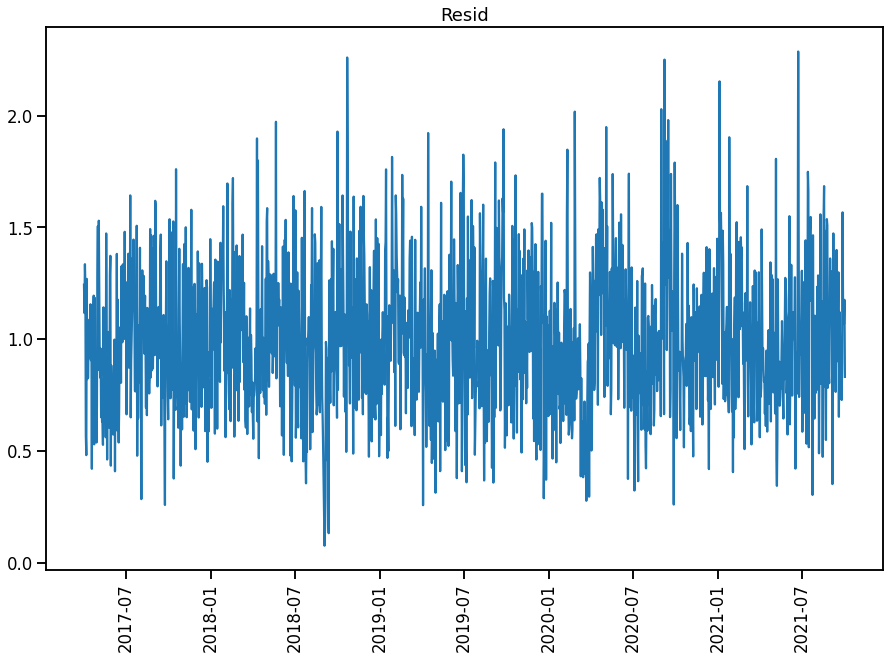

In [231]:
plt.plot(descomposicion_vict_dia.resid);
plt.xticks(rotation=90);
plt.title("Resid")
plt.show()


### **Por Mes de cada año**

In [232]:
df_victimas_x_mes.head()

,mes_del_anio,victima_cantidad
0,2017-01,1648
1,2017-02,1393
2,2017-03,1617
3,2017-04,1309
4,2017-05,1212


Lo pasamos de nuevo a `datatime`

In [233]:
df_victimas_x_mes['mes_del_anio']= [dt.datetime.strptime(i, '%Y-%m') for i in df_victimas_x_mes.mes_del_anio]

Establecemos como índice la fecha `mes_del_anio`

In [234]:
df_victimas_x_mes= df_victimas_x_mes.set_index('mes_del_anio')
df_victimas_x_mes.head()


,victima_cantidad
mes_del_anio,
2017-01-01,1648
2017-02-01,1393
2017-03-01,1617
2017-04-01,1309
2017-05-01,1212


En este caso usamos el modelo multiplicativo.

Y utlizamos la frecuencia de 6 ya que es la mitad de observaciones que tiene nuestro modelo a analizar.


In [235]:
descomposicion_vict = sm.tsa.seasonal_decompose(df_victimas_x_mes['victima_cantidad'],
                                                  model='mult', freq=6)  


Analizamos por separado

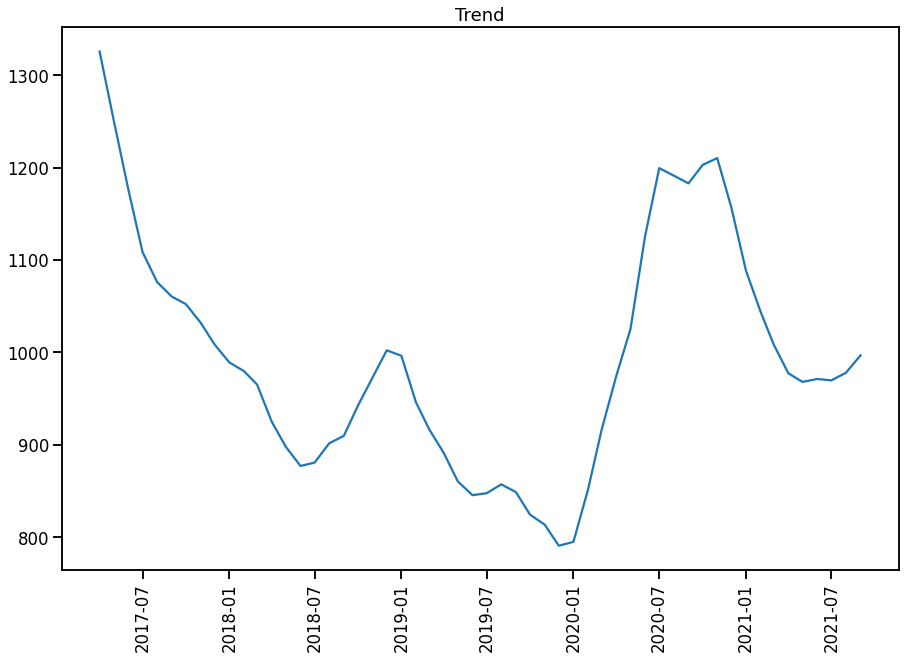

In [236]:
plt.plot(descomposicion_vict.trend);
plt.xticks(rotation=90);
plt.title("Trend")
  
plt.show() 

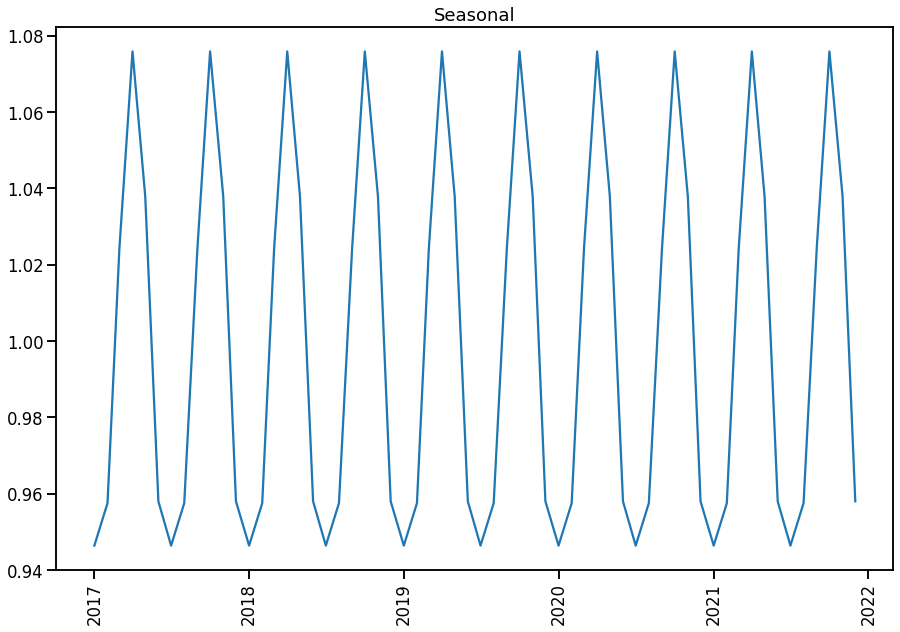

In [237]:
plt.plot(descomposicion_vict.seasonal);
plt.xticks(rotation=90);
plt.title("Seasonal")
plt.show() 


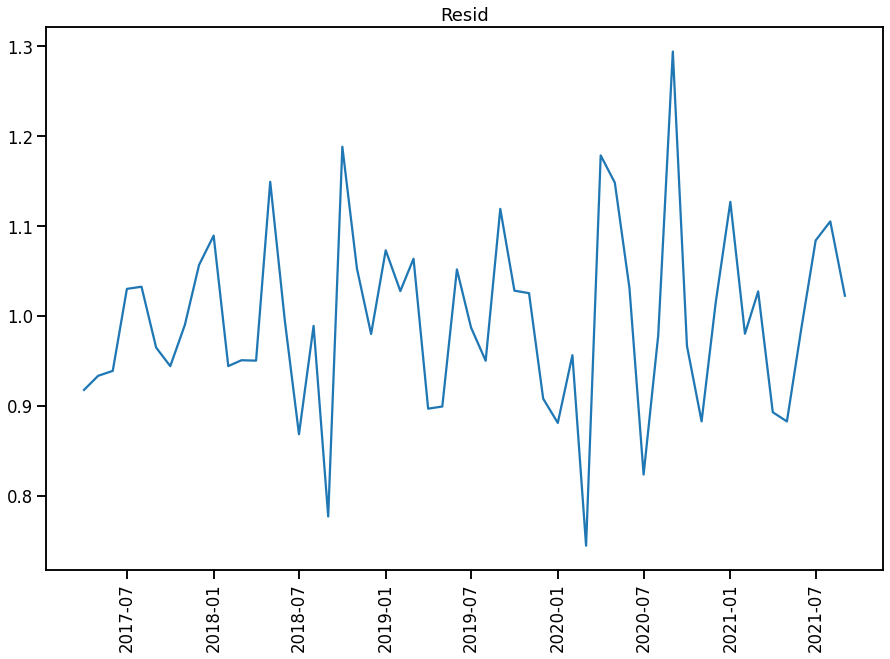

In [238]:
plt.plot(descomposicion_vict.resid);
plt.xticks(rotation=90);
plt.title("Resid")
  
plt.show() 


<html>
  <hr>
  <h1  align="center";> 
    Holt-Winters Forecasting
  </h1>
  <hr>
</html>



Holt-Winters es un modelo de comportamiento de series de tiempo. La previsión siempre requiere un modelo, y Holt-Winters es una forma de modelar tres aspectos de la serie temporal:
- un valor típico (promedio)
- una pendiente (tendencia) a lo largo del tiempo 
- un patrón cíclico repetitivo (estacionalidad).

<html>
  <h2  align="center";> 
    Exponential smoothing
  </h2>
</html>


El **suavizado exponencial**, Exponential Smothing, es un método de pronóstico de series temporales para datos univariados que se puede ampliar para respaldar datos con una tendencia sistemática o un componente estacional.

### **Por Dia de cada año**

#### **Suavizado exponencial simple**

- Serie temporal básica, solo con un componente.

- La función del suavizado exponencial simple de `statsmodels` realiza las mismas estimaciones que el método de promedios ponderados de pandas.

Establecemos el valor de `alpha` y definimos `m` (Time Period)

In [239]:
m = 365
alpha = 1/(2*m)

In [240]:
df_victimas_x_dia['HWES1'] = SimpleExpSmoothing(df_victimas_x_dia['victima_cantidad']).fit(smoothing_level= alpha, optimized=False, use_brute=True).fittedvalues


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [241]:
fig = px.line(df_victimas_x_dia, x=df_victimas_x_dia.index, y=['victima_cantidad','HWES1'], title='Holt Winters Single Exponential Smoothing')
fig.show()

>**Observación:**
>
>Esta función no se ajusta a los valores reales.

#### **Serie temporal con 2 componentes, un aditivo y un multiplicativo.**

Cuando el suavizado exponencial simple emplea solo un factor de suavizado (alpha), el suavizado exponencial doble agrega un segundo factor de suavizado (beta) que aborda las tendencias en los datos. Al igual que el factor alpha, los valores para el factor beta están entre cero y uno. El beneficio aquí es que el modelo puede anticipar futuros aumentos o disminuciones donde el modelo de un solo factor solo tendría en cuenta los valores más recientes.

También podemos abordar diferentes tipos de cambio (crecimiento / decadencia) en la tendencia. 

Si una serie temporal muestra una tendencia inclinada en línea recta, se usaría un ajuste aditivo. 

Si la serie temporal muestra una tendencia exponencial (curva), se usaría un ajuste multiplicativo.


In [242]:
df_victimas_x_dia['HWES2_ADD'] = ExponentialSmoothing(df_victimas_x_dia['victima_cantidad'], trend='add').fit().fittedvalues



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [243]:
df_victimas_x_dia['HWES2_MUL'] = ExponentialSmoothing(df_victimas_x_dia['victima_cantidad'], trend='mul').fit().fittedvalues


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning:

overflow encountered in matmul



In [244]:
fig = px.line(df_victimas_x_dia, x=df_victimas_x_dia.index, y=['victima_cantidad','HWES2_ADD','HWES2_MUL'], title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')
fig.show()

>**Observación:**
>
>Aunque se obtienen valores menores que los valores reales, parece que un ajuste multiplicativo da mejores resultados teniendo en cuenta que la línea verde se superpone aproximadamente a los datos originales.

#### Suavizado Exponencial Triple

Suavizado exponencial triple o Holt-Winters, añade soporte para la **tendencia** y la **estacionalidad**.


In [245]:
df_victimas_x_dia['HWES3_ADD'] = ExponentialSmoothing(df_victimas_x_dia['victima_cantidad'],trend= 'add',seasonal= 'add',seasonal_periods=365).fit().fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [246]:
df_victimas_x_dia['HWES3_MUL'] = ExponentialSmoothing(df_victimas_x_dia['victima_cantidad'],trend= 'mul',seasonal= 'mul',seasonal_periods=365).fit().fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [247]:
fig = px.line(df_victimas_x_dia, x=df_victimas_x_dia.index, y=['victima_cantidad','HWES3_ADD','HWES3_MUL'], title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')
fig.show()


>**Observación:**
>
>Aunque se obtienen menores que los valores reales, como el anteior, parece que un ajuste multiplicativo da mejores resultados teniendo en cuenta que la línea verde se superpone aproximadamente a los datos originales.
>
> Añadiendo los parámetros para la tendencia y la estacionalidad, tenemos mejores resultados de los datos a comparación de usar solamente dos componentes.

### **Por Mes de cada año**

#### **Suavizado exponencial simple**

Serie temporal básica, solo con una componente.

La función del suavizado exponencial simple de `statsmodels` realiza las mismas estimaciones que el método de promedios ponderados de pandas.

Establecemos el valor de `alpha` y definimos `m` (Time Period)

In [248]:
# Establece el valor de Alpha y define m (Time Period)
m = 12
alpha = 1/(2*m)

In [249]:
df_victimas_x_mes['HWES1'] = SimpleExpSmoothing(df_victimas_x_mes['victima_cantidad']).fit(smoothing_level= alpha, optimized=False, use_brute=True).fittedvalues


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [250]:
fig = px.line(df_victimas_x_mes, x=df_victimas_x_mes.index, y=['victima_cantidad','HWES1'], title='Holt Winters Single Exponential Smoothing')
fig.show()

>**Observación:**
>
>Esta función no se ajusta a los valores reales.

#### **Serie temporal con 2 componentes, un aditivo y un multiplicativo.**

Cuando el suavizado exponencial simple emplea solo un factor de suavizado (alpha), el suavizado exponencial doble agrega un segundo factor de suavizado (beta) que aborda las tendencias en los datos. Al igual que el factor alpha, los valores para el factor beta están entre cero y uno. El beneficio aquí es que el modelo puede anticipar futuros aumentos o disminuciones donde el modelo de un solo factor solo tendría en cuenta los valores más recientes.

También podemos abordar diferentes tipos de cambio (crecimiento / decadencia) en la tendencia. 

Si una serie temporal muestra una tendencia inclinada en línea recta, se usaría un ajuste aditivo. 

Si la serie temporal muestra una tendencia exponencial (curva), se usaría un ajuste multiplicativo.


In [251]:
df_victimas_x_mes['HWES2_ADD'] = ExponentialSmoothing(df_victimas_x_mes['victima_cantidad'],trend='add').fit().fittedvalues



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [252]:
df_victimas_x_mes['HWES2_MUL'] = ExponentialSmoothing(df_victimas_x_mes['victima_cantidad'],trend='mul').fit().fittedvalues


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning:

overflow encountered in matmul



In [253]:
fig = px.line(df_victimas_x_mes, x=df_victimas_x_mes.index, y=['victima_cantidad','HWES2_ADD','HWES2_MUL'], title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')
fig.show()

>**Observación:**
>
>Aunque se obtienen valores menores que los valores reales, parece que un ajuste multiplicativo da mejores resultados teniendo en cuenta que la línea verde se aproxima mejor a los datos originales.

#### Suavizado Exponencial Triple

Suavizado exponencial triple o Holt-Winters, añade soporte para la **tendencia** y la **estacionalidad**.

In [254]:
df_victimas_x_mes['HWES3_ADD'] = ExponentialSmoothing(df_victimas_x_mes['victima_cantidad'],trend= 'add',seasonal= 'add',seasonal_periods=12).fit().fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [255]:
df_victimas_x_mes['HWES3_MUL'] = ExponentialSmoothing(df_victimas_x_mes['victima_cantidad'],trend= 'mul',seasonal= 'mul',seasonal_periods=12).fit().fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning:

overflow encountered in matmul



In [256]:
fig = px.line(df_victimas_x_mes, x=df_victimas_x_mes.index, y=['victima_cantidad','HWES3_ADD','HWES3_MUL'], title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')
fig.show()


>**Observación:**
>
>Aunque se obtienen menores que los valores reales, como el anteior, parece que un ajuste multiplicativo da mejores resultados teniendo en cuenta que la línea verde se superpone aproximadamente a los datos originales.
>
> Añadiendo los parámetros para la tendencia y la estacionalidad, tenemos mejores resultados de los datos a comparación de usar solamente dos componentes.

---
## Predicción


### **Por Día de cada año**

Se utilizan los últimos 524 días, un 20% del dataset, como conjunto de test para evaluar la capacidad predictiva del modelo.

In [257]:
steps = 524
train_vict_dia = df_victimas_x_dia[:-steps]
test_vict_dia = df_victimas_x_dia[-steps:]


In [258]:
fitted_model = ExponentialSmoothing(train_vict_dia['victima_cantidad'], trend= 'mul', seasonal= 'mul', seasonal_periods=365).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



In [259]:
test_predictions = fitted_model.forecast(steps) 


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



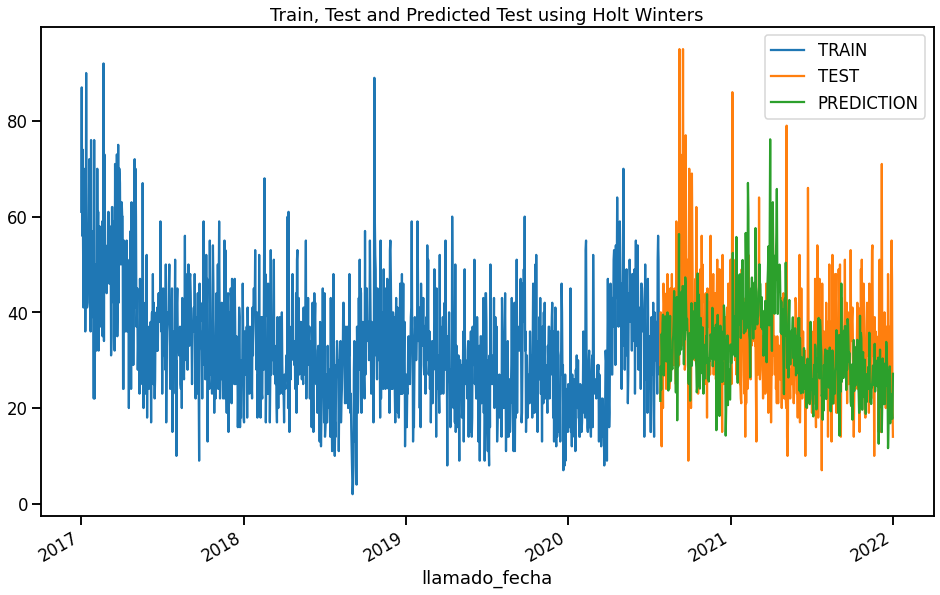

In [260]:
train_vict_dia['victima_cantidad'].plot(legend=True, label='TRAIN')
test_vict_dia['victima_cantidad'].plot(legend=True, label='TEST', figsize=(16,10))
test_vict_dia['test_pred']= test_predictions.values
test_vict_dia['test_pred'].plot(legend=True, label='PREDICTION') 
plt.title('Train, Test and Predicted Test using Holt Winters');


>**Observación:**
>
> Según la observación del gráfico, para los últimos 524 días la predicción de ese perído señala una disminución de los casos pero a comparación del test, no fue así.
>
> En ese período de tiempo hubo varios picos de casos, pero en la predicción para ese último período de tiempo los casos disminuyeron.
>
> 
> En la segunda mitad del 2020 hubo un pico marcado que puede deberse a la cantidad de tiempo que las denunciantes incrementaron el tiempo compartido con sus victimarios debido a la pandemia. Esto coincide con las diversas publicaciones al respecto del fuerte incremento de casos de violencia de genero denunciados en el primer año de la pandemia. Sin embargo luego de esto se continuo la tendencia previa, pero sin una disminución. Esto se puede justificar por la pandemia y las condiciones excepcionales de ese período de tiempo. Sin embargo aunque las predicciones no se ajusten a lo que sucedió, es interesante analizarlo y ver que se confirma tambien con nuestro tipo de datos la tendencia global.


### **Por Mes de cada año**

Se utilizan los últimos 18 meses como conjunto de test para evaluar la capacidad predictiva del modelo.

In [261]:
steps = 18
train_vict_mes = df_victimas_x_mes[:-steps]
test_vict_mes = df_victimas_x_mes[-steps:]


In [262]:
fitted_model = ExponentialSmoothing(train_vict_mes['victima_cantidad'], trend= 'mul', seasonal= 'mul', seasonal_periods=12).fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:80: RuntimeWarning:

overflow encountered in matmul



In [263]:
test_predictions = fitted_model.forecast(steps) 


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

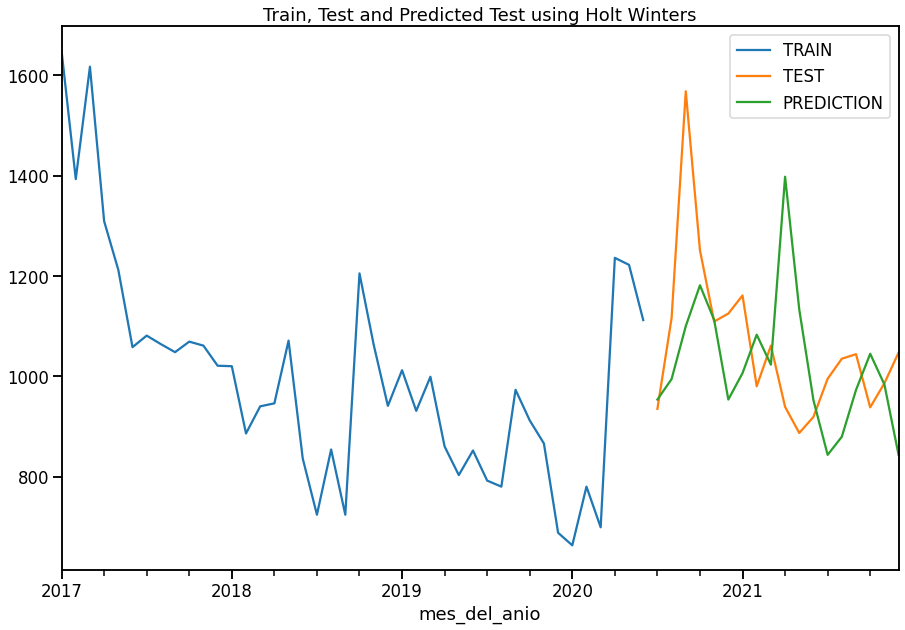

In [264]:
train_vict_mes['victima_cantidad'].plot(legend=True, label='TRAIN');
test_vict_mes['victima_cantidad'].plot(legend=True, label='TEST');
test_vict_mes['test_pred'] = test_predictions.values
test_vict_mes['test_pred'].plot(legend=True, label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

>**Observación:**
>
> Según la observación del gráfico, para los últimos 18 meses la predicción de ese perído señala una disminución de los casos a comparación del test.
>
> En ese período de tiempo hubo varios picos de casos, pero en la predicción para ese último período de tiempo los casos disminuyeron auqnue hay varios puntos de intersección en el último período.
>



## Test vs Predicción

Analizamos los dos ultimos años

### **Por Día de cada año**

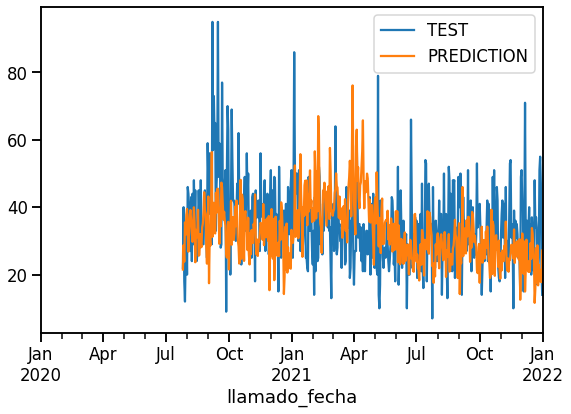

In [265]:
test_vict_dia['victima_cantidad'].plot(legend=True, label='TEST', figsize=(9,6))
test_vict_dia['test_pred'].plot(legend=True, label= 'PREDICTION', xlim= ['2020-01-01','2022-01-01']);

### **Por Mes de cada año**

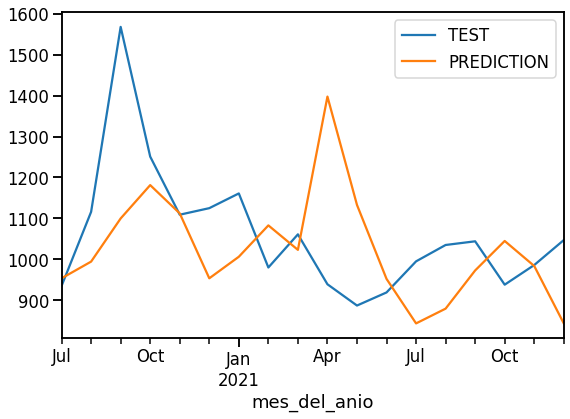

In [266]:
test_vict_mes['victima_cantidad'].plot(legend=True, label='TEST', figsize=(9,6))
test_vict_mes['test_pred'].plot(legend=True, label= 'PREDICTION', xlim= ['2020-07','2021-12']);

# Metricas de evaluación

Para analizar el rendimiento del modelo tendremos en cuenta:

- MAE(Mean Absolute Error)

- MSE(Mean Squared Error) 

como métricas. 

### Por Dia

Analizamos si existen valores nulos

In [267]:
test_vict_dia['test_pred'].isna().sum()

0

In [274]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [275]:
Mean_Absolute_Error = mean_absolute_error(test_vict_dia['victima_cantidad'], test_vict_dia['test_pred'])
Mean_Squared_Error = mean_squared_error(test_vict_dia['victima_cantidad'], test_vict_dia['test_pred'])
Root_Mean_Square_Error = math.sqrt(Mean_Squared_Error)

In [276]:
print('Mean_Absolute_Error:', Mean_Absolute_Error)
print('Mean_Squared_Error:', Mean_Squared_Error)
print('Root_Mean_Square_Error:', Root_Mean_Square_Error)

Mean_Absolute_Error: 11.274937430934235
Mean_Squared_Error: 218.92340055933704
Root_Mean_Square_Error: 14.796060305342671


### Por Mes

Analizamos si existen valores nulos

In [277]:
test_vict_mes['test_pred'].isna().sum()

0

In [278]:
Mean_Absolute_Error = mean_absolute_error(test_vict_mes['victima_cantidad'], test_vict_mes['test_pred'])
Mean_Squared_Error = mean_squared_error(test_vict_mes['victima_cantidad'], test_vict_mes['test_pred'])
Root_Mean_Square_Error = math.sqrt(Mean_Squared_Error)

In [279]:
print('Mean_Absolute_Error:', Mean_Absolute_Error)
print('Mean_Squared_Error:', Mean_Squared_Error)
print('Root_Mean_Square_Error:', Root_Mean_Square_Error)

Mean_Absolute_Error: 143.17701240788432
Mean_Squared_Error: 37868.65567040164
Root_Mean_Square_Error: 194.59870418479574


>**Observación:**
>
> - El **error absoluto medio**  es una cantidad que se utiliza para medir qué tan cerca están las predicciones de los resultados. En este caso el error nos da muy lejanos al esperado.
>
> - El **error cuadrático medio** (RMSE) : RMSE es una regla de puntuación cuadrática que también mide la magnitud promedio del error. Es la raíz cuadrada del promedio de las diferencias al cuadrado entre la predicción y la observación real.
>
> - Observamos que el MAE es menor que el RMSE donde ambas métricas pueden variar de 0 a infinito y son indiferentes a la dirección de los errores. Son puntajes orientados negativamente, lo que significa que los valores más bajos son mejores.
>
>- En el caso de **Dia por Año**, los resultados son más optimistas a comparación de **Mes por Año** ya que está muy alejado al 0. Esto puede deberse a los valores atípicos o picos que hubo en ese período de tiempo.
>



<html>
  <hr>
  <h1  align="center";> 
    Conclusión
  </h1>
  <hr>
</html>


- De acuerdo al análisis que se realizó, se puede concluir en que el modelo que toma la cantidad de llamadas por día, tuvo una prediccion más aproximada que el modelo que toma la cantidad de llamados por mes. 

- Se realizó una investigación para observar si lo que se observa coincide con algún otro estudio en esa misma época. Para ellos se busco en primer lugar, noticias relacionadas a la cantidad de llamados realizados para el año 2020 en la provincia de Córdoba, donde la cantidad de llamadas aumentó un promedio de 300 llamadas diarias.  [Cuarentena: hubo más de 5 mil llamadas por violencia familiar y de género en Córdoba](https://www.lavoz.com.ar/ciudadanos/cuarentena-hubo-mas-de-5-mil-llamadas-por-violencia-familiar-y-de-genero-en-cordoba/
)
- Esto puede observarse en el análisis que tomó a la cantidad de llamados por mes, en la que para el año 2021, la cantidad de llamados aumentó consideralemente. Para este caso, la predicción brindo valores mucho más elevados de los que realmente fueron.

- En el caso de **Dia por Año**, los resultados MAE y RMSE son más optimistas a comparación de **Mes por Año** ya que está muy alejado al 0. Esto puede deberse a los valores atípicos o picos que hubo en ese período de tiempo.
